In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

from config import db_pw


In [16]:
print(db_pw)

0ct@v1006!pG


In [19]:
user = "postgres"
password = db_pw
host = "localhost"
port = "5432"
db = "sql_challenge_db"
uri = f"postgresql://{user}:{password}@{host}:{port}/{db}"

In [20]:
engine = create_engine(uri)
connection = engine.connect()

In [22]:
sql = " select t.title, s.salary \
        from titles as t \
        inner join employees as e \
        on t.emp_no = e.emp_no \
        inner join salaries as s \
        on e.emp_no = s.emp_no"
list(engine.execute(sql))

[('Senior Staff', 78228),
 ('Staff', 78228),
 ('Engineer', 72488),
 ('Staff', 42365),
 ('Engineer', 55881),
 ('Senior Engineer', 55881),
 ('Engineer', 41538),
 ('Senior Engineer', 41538),
 ('Engineer', 49324),
 ('Senior Engineer', 49324),
 ('Engineer', 41971),
 ('Senior Staff', 52787),
 ('Engineer', 47280),
 ('Engineer', 55786),
 ('Senior Engineer', 55786),
 ('Senior Engineer', 40000),
 ('Engineer', 61395),
 ('Senior Staff', 45312),
 ('Senior Staff', 40000),
 ('Staff', 40000),
 ('Engineer', 56990),
 ('Senior Engineer', 56990),
 ('Senior Staff', 54635),
 ('Staff', 54635),
 ('Staff', 50568),
 ('Senior Engineer', 40000),
 ('Senior Staff', 68334),
 ('Staff', 68334),
 ('Senior Staff', 79474),
 ('Staff', 79474),
 ('Staff', 40000),
 ('Senior Staff', 89606),
 ('Staff', 89606),
 ('Engineer', 56292),
 ('Engineer', 50330),
 ('Senior Engineer', 50330),
 ('Engineer', 40000),
 ('Engineer', 51703),
 ('Engineer', 40000),
 ('Senior Staff', 58239),
 ('Staff', 58239),
 ('Senior Engineer', 40000),
 ('Seni

In [25]:
df = pd.read_sql(sql, con=engine)

In [39]:
df.sort_values("salary")

,title,salary
443307,Staff,40000
248928,Engineer,40000
97368,Technique Leader,40000
97364,Senior Engineer,40000
97363,Engineer,40000
...,...,...
269290,Staff,126703
45356,Staff,127041
339069,Senior Staff,127238
352179,Staff,129492


Text(0.5, 0, 'Salary Ranges')

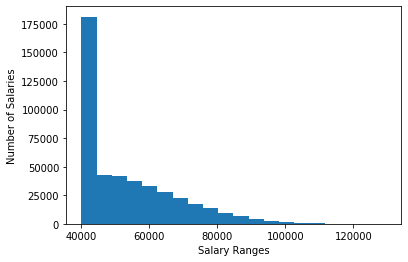

In [30]:
plt.hist(df["salary"],bins=20)
plt.ylabel("Number of Salaries")
plt.xlabel("Salary Ranges")

In [36]:
gb = df.groupby("title")

In [37]:
gb["salary"].mean()

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

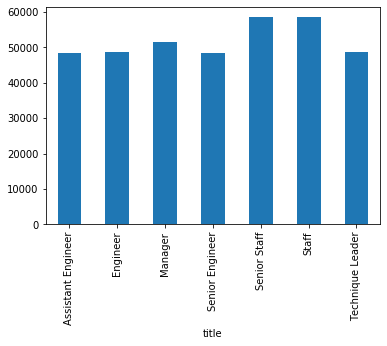

In [42]:
gb["salary"].mean().plot(kind='bar')